In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
train = pd.read_csv("../data/CleanedBorderdata_2008-2018.csv", parse_dates=["Date"])
train.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Latitutde,Longitude
0,Van Buren,Maine,108,US-Canada Border,2018-12-01,Trucks,1204,-67.94271,47.16207
1,Maida,North Dakota,3416,US-Canada Border,2018-12-01,Trucks,170,-98.36953,48.98568
2,Douglas,Arizona,2601,US-Mexico Border,2018-12-01,Buses,210,-109.54472,31.34444
3,Presidio,Texas,2403,US-Mexico Border,2018-12-01,Bus Passengers,238,-104.37167,29.56056
4,Anacortes,Washington,3010,US-Canada Border,2018-12-01,Personal Vehicle Passengers,5350,-122.61739,48.49988


In [4]:
train['Year'] = train["Date"].dt.year
train['Month'] = train["Date"].dt.month
train.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Latitutde,Longitude,Year,Month
0,Van Buren,Maine,108,US-Canada Border,2018-12-01,Trucks,1204,-67.94271,47.16207,2018,12
1,Maida,North Dakota,3416,US-Canada Border,2018-12-01,Trucks,170,-98.36953,48.98568,2018,12
2,Douglas,Arizona,2601,US-Mexico Border,2018-12-01,Buses,210,-109.54472,31.34444,2018,12
3,Presidio,Texas,2403,US-Mexico Border,2018-12-01,Bus Passengers,238,-104.37167,29.56056,2018,12
4,Anacortes,Washington,3010,US-Canada Border,2018-12-01,Personal Vehicle Passengers,5350,-122.61739,48.49988,2018,12


In [5]:
df = pd.DataFrame(train, columns = ["Month", "Value", "Measure"])
df1 = df.groupby(["Measure"]).sum()
df1

,Month,Value
Measure,,
Bus Passengers,86271,53656491
Buses,86254,3412673
Pedestrians,85373,466571411
Personal Vehicle Passengers,94720,2083394170
Personal Vehicles,94875,1100737255
Rail Containers Empty,78463,12400220
Rail Containers Full,78307,20660556
Train Passengers,78114,3063067
Trains,78641,404622


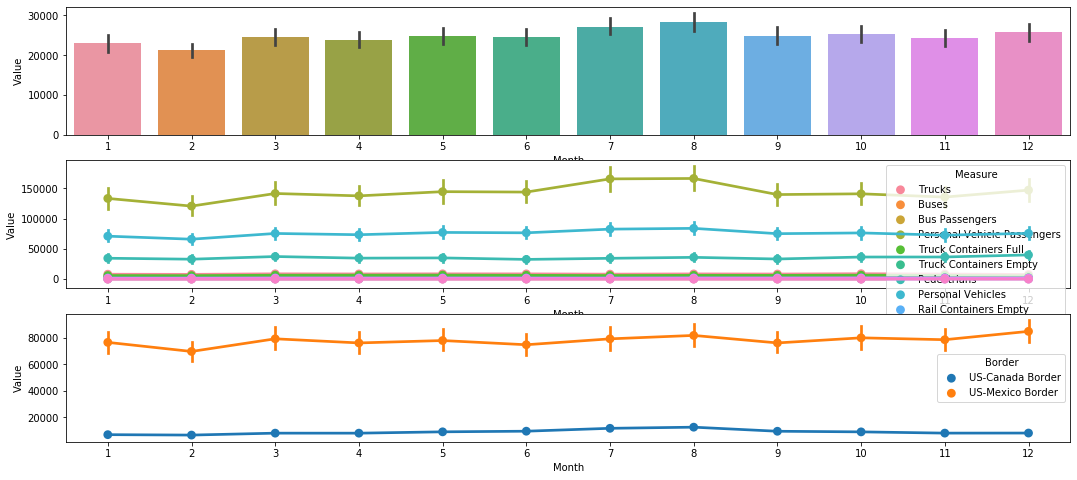

In [6]:
figure, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1)
figure.set_size_inches(18, 8)
sns.barplot(data=train, x="Month", y="Value", ax=ax1)
sns.pointplot(data=train, x="Month", y="Value", hue="Measure", ax=ax2)
sns.pointplot(data=train, x="Month", y="Value", hue="Border", ax=ax3)

# Decrease in Feb for Personal Vehicle Passengers but not much on Personal Vehicles
# - have more chance to travel

## February
Since February is very low number especially with Personal Vehicle Passengers, it might be realted number of travel.
## Factor travel?

In [7]:
travel = pd.read_csv("../data/Travel_to_US.csv")

In [12]:
travel = pd.DataFrame(travel, columns = ["Month", "Country", "Count"])
travel1 = travel.groupby(["Month", "Country"]).sum()
travel1 = travel1.reset_index()
travel1.head()

,Month,Country,Count
0,1,Canada,10657421
1,1,Mexico,9827480
2,2,Canada,9727111
3,2,Mexico,7876750
4,3,Canada,14385218


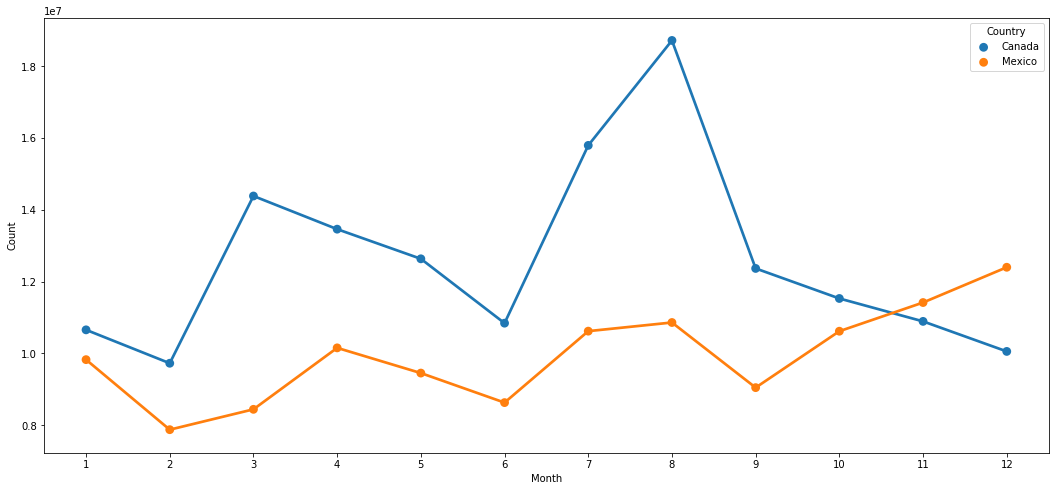

In [13]:
figure, (ax4) = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 8)
sns.pointplot(data=travel1, x="Month", y="Count", hue='Country', ax=ax4)

## Lowest Travel to US
Since they have lowest number of travel in February, it has more possibility that travel and border crossing are relative.